In [3]:
import pandas as pd
from pylab import *
from TBTree_PulseAmpFitter import PulseAmpFitter
from matplotlib.patches import Rectangle
%matplotlib inline
dataDir = "../data"

# 0. Example Fit

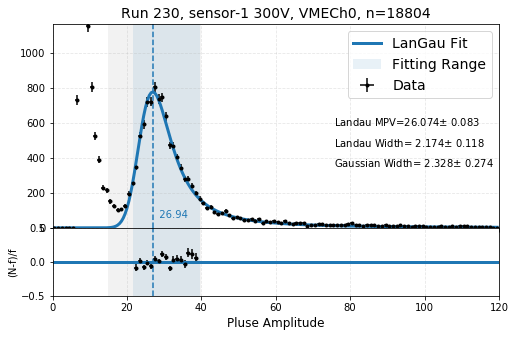

 FCN=13.8367 FROM MIGRAD    STATUS=CONVERGED     448 CALLS         449 TOTAL
                     EDM=5.9841e-08    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  LandauWidth   2.17421e+00   1.18034e-01   1.25474e-04  -1.83927e-03
   2  LandauMPV    2.60736e+01   8.28436e-02   1.86208e-04  -4.33775e-05
   3  Normalisation   4.87173e+03   5.90223e+02   1.36621e-01   1.93543e-06
   4  GaussianSigma   2.32849e+00   2.73664e-01   7.04514e-05   4.27204e-03
                               ERR DEF= 0.5


In [40]:
run = "230"
df = pd.read_pickle(dataDir + "/TBTree/{}.pkl".format(run))
# load channel
backend, channel = "VME", 0
key = "{}Ch{}".format(backend,channel)
ch = df.query("{}_pulsePosPassCuts>0 & {}_pulseAmpPassCuts>0".format(key,key))

# fitting
fitter = PulseAmpFitter(ch[key+"_pulseAmp"],binsize=1)
fitter.fitRange(15,40, None, True)
# plot
fitter.plot()
title = "Run {}, sensor-1 300V, {}, n={}".format(run, key, len(ch))
fitter.axes[0].set_title(title, fontsize=14)

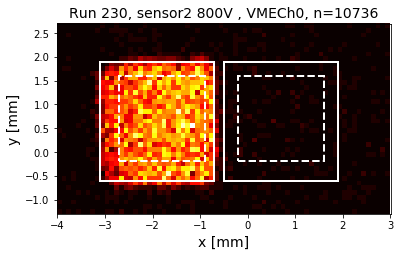

In [44]:
# chplot = ch.query("{}<{}_pulseAmp<{} and nTriples==1".format(fitter.fit_xmin, key, fitter.fit_xmax))

def plotHeat(sensor, cut="", comment=""):
    chplot = ch.query(cut + "nTriples==1")
    plt.figure(figsize=(6,3.5),facecolor='w')
    x = np.array([chplot.tposX_dut]).reshape(-1)
    y = np.array([chplot.tposY_dut]).reshape(-1)
    xBins,yBins = np.arange(-4,3.1,0.1),np.arange(-1.3,2.8,0.1)
    plt.hist2d(x,y,bins=(xBins,yBins),cmap="hot")
    
    
    currentAxis = plt.gca()
    currentAxis.add_patch(Rectangle((-3.1,-0.6), 2.4, 2.5, fill=None, color='w', linestyle="-",linewidth=2, alpha=1))
    currentAxis.add_patch(Rectangle((-2.7,-0.2), 1.8, 1.8, fill=None, color='w', linestyle="--",linewidth=2, alpha=1))

    currentAxis.add_patch(Rectangle((-0.5,-0.6), 2.4, 2.5, fill=None, color='w', linestyle="-", linewidth=2, alpha=1))
    currentAxis.add_patch(Rectangle((-0.2,-0.2), 1.8, 1.8, fill=None, color='w', linestyle="--", linewidth=2, alpha=1))


    plt.xlabel("x [mm]",fontsize=14)
    plt.ylabel("y [mm]",fontsize=14)
    plt.axis('equal')
    plt.xlim(-4,3)
    plt.ylim(-1.3,2.7)
    title = "Run {}, {} {}V {}, {}, n={}".format(run, sensor, runMng["u"][i], comment, key, len(chplot))
    plt.title(title, fontsize=14)
    
plotHeat("sensor2")
# plt.savefig("../plots/heatmap/{}/run{}_{}.png".format("sensor1",run,key),dpi=300)
# plt.close()

# 1. Fit Sensor 1

In [45]:
runMng = {
    "u"  :[50,100,150,200,250,300,350,400,500],               
    "run":["223","216","217","218","219","198","220","221","222"],
    "uTCACh2_fitRange":[(12,60),(20,80),(20,80),(20,80),(25,80),(25,80),(25,80),(25,80),(25,80)],
    "uTCACh3_fitRange":[(12,60),(20,80),(20,80),(20,80),(25,80),(25,80),(25,80),(25,80),(25,80)],
    "VMECh2_fitRange" :[( 6,40),(10,40),(10,40),(15,40),(15,40),(15,40),(15,40),(15,40),(15,40)],
    "VMECh3_fitRange" :[( 6,40),(10,40),(10,40),(15,40),(15,40),(15,40),(15,40),(15,40),(15,40)],
    "uTCACh2_mpv":[],"uTCACh3_mpv":[],"VMECh2_mpv":[],"VMECh3_mpv":[],
    }

for i in range(len(runMng["run"])):
    run = runMng["run"][i]
    df = pd.read_pickle(dataDir + "/TBTree/{}.pkl".format(run))
    for backend in ["uTCA","VME"]:
        for channel in "23":
            # get channe;
            key = "{}Ch{}".format(backend,channel)
            ch = df.query("{}_pulsePosPassCuts>0 & {}_pulseAmpPassCuts>0".format(key,key))
            title = "Run {}, sensor-1 {}V, {}, n={}".format(run,runMng["u"][i], key, len(ch))
            # fitting
            xmin,xmax = runMng[key+"_fitRange"][i]
            fitter = PulseAmpFitter(ch[key+"_pulseAmp"],binsize=1)
            fitter.fitRange(xmin,xmax, None, True)
            runMng[key+"_mpv"].append(fitter.param["argmax"])
            # plot
            fitter.plot()
            fitter.axes[0].set_title(title, fontsize=14)
            plt.savefig("../plots/fitPulseAmp/sensor1/run{}_{}.png".format(run,key),dpi=300)
            plt.close()
            
            # make heatmap
            plotHeat("sensor1")
            plt.savefig("../plots/heatmap/{}/run{}_{}.png".format("sensor1",run,key),dpi=300)
            plt.close()


pd.DataFrame(runMng).to_pickle(dataDir + "/FitPulseAmp/sensor1.pkl")

 FCN=11.2038 FROM MIGRAD    STATUS=CONVERGED     652 CALLS         653 TOTAL
                     EDM=1.36162e-06    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  LandauWidth   1.99433e+00   3.12473e-01   1.79678e-04  -4.73084e-03
   2  LandauMPV    2.02340e+01   2.27442e-01   3.21220e-04   3.83017e-03
   3  Normalisation   1.63433e+03   2.94335e+02   5.73331e-02  -2.10650e-06
   4  GaussianSigma   3.80639e+00   6.92475e-01   1.52342e-04  -1.80122e-03
                               ERR DEF= 0.5
 FCN=11.9084 FROM MIGRAD    STATUS=CONVERGED     516 CALLS         517 TOTAL
                     EDM=1.92433e-08    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  LandauWidth   2.34915e+00   2.15590e-01   1.73893

# 2. Fit Sensor 2

In [46]:
runMng = {
    "u"  :[50,100,150,200,250,300,350,400,500,600,800],               
    "run":["225","226","228","229","230","231","237","238","239","240","241"],
    "uTCACh0_fitRange":[(12,40),(20,60),(30,60),(30,70),(40,90),(40,90),(50,90),(50,90),(50,90),(55,110),(55,110)],
    "uTCACh1_fitRange":[( 8,20),(12,50),(20,50),(20,60),(24,70),(30,70),(30,80),(30,80),(30,90),(30, 90),(30, 90)],
    "VMECh0_fitRange" :[(-1,-1),(10,40),(15,40),(15,50),(20,60),(25,60),(25,60),(25,60),(25,60),(25, 60),(25, 60)],
    "VMECh1_fitRange" :[(-1,-1),( 5,20),( 8,30),(10,30),(10,40),(15,40),(15,40),(15,40),(15,40),(15, 40),(15, 40)],
    "uTCACh0_mpv":[],"uTCACh1_mpv":[],"VMECh0_mpv":[],"VMECh1_mpv":[],
    }
                
for i in range(len(runMng["run"])):
    run = runMng["run"][i]
    df = pd.read_pickle(dataDir + "/TBTree/{}.pkl".format(run))
    for backend in ["uTCA","VME"]:
        for channel in "01":
            # get channe;
            key = "{}Ch{}".format(backend,channel)
            ch = df.query("{}_pulsePosPassCuts>0 & {}_pulseAmpPassCuts>0".format(key,key))
            title = "Run {}, sensor-2 {}V, {}, n={}".format(run,runMng["u"][i], key, len(ch))
            # fitting
            xmin,xmax = runMng[key+"_fitRange"][i]
            if xmin==-1:
                runMng[key+"_mpv"].append(np.nan)
                continue
            fitter = PulseAmpFitter(ch[key+"_pulseAmp"],binsize=1)
            fitter.fitRange(xmin,xmax, None, True)
            runMng[key+"_mpv"].append(fitter.param["argmax"])
            # plot
            fitter.plot()
            fitter.axes[0].set_title(title, fontsize=14)
            plt.savefig("../plots/fitPulseAmp/sensor2/run{}_{}.png".format(run,key),dpi=300)
            plt.close()
            
            # make heatmap
            # make heatmap
            plotHeat("sensor2","{}_pulseAmp>{} and ".format(key,xmin), "Primary Pulse")
            plt.savefig("../plots/heatmap/{}/run{}_{}_primary.png".format("sensor2",run,key),dpi=300)
            plt.close()
            
            # make heatmap
            plotHeat("sensor2","{}_pulseAmp<{} and ".format(key,xmin), "Secondary Pulse")
            plt.savefig("../plots/heatmap/{}/run{}_{}_secondary.png".format("sensor2",run,key),dpi=300)
            plt.close()

pd.DataFrame(runMng).to_pickle(dataDir + "/FitPulseAmp/sensor2.pkl")

 FCN=5.27399 FROM MIGRAD    STATUS=CONVERGED     429 CALLS         430 TOTAL
                     EDM=1.65127e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  LandauWidth   1.82722e+00   1.22722e-01   8.79885e-05   4.15004e-03
   2  LandauMPV    1.75118e+01   8.94046e-02   1.30257e-04   3.94643e-03
   3  Normalisation   3.25945e+03   5.24654e+02   7.76027e-02  -1.38887e-06
   4  GaussianSigma   1.90568e+00   3.00021e-01   4.85351e-05  -9.46142e-04
                               ERR DEF= 0.5
 FCN=12.6391 FROM MIGRAD    STATUS=CONVERGED     562 CALLS         563 TOTAL
                     EDM=3.67784e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  LandauWidth   9.90607e-01   1.40161e-01   1.02540

Warning in <Fit>: Abnormal termination of minimization.
Warning in <Fit>: Abnormal termination of minimization.
Warning in <Fit>: Abnormal termination of minimization.
